#UPLOADING DATASET OF REVIEWS

In [ ]:
import pandas as p
import nltk as nl
nl.download('punkt')
nl.download('wordnet')
import re
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = p.read_csv("data.csv")

#PREPROCESSING STEPS OF NLP

##MAKING ALL REVIEWS IN LOWECASE

In [ ]:
# df=df.drop("rating",axis=1)

In [ ]:
df["review"] = df["review"].astype(str)

In [ ]:
print(type(df["review"].loc[0]))

<class 'str'>


In [ ]:
df["review"]=df["review"].str.lower()

##REMOVING PUNTUATION FROM REVIEWS



In [ ]:
import string

In [ ]:
df["review"]=df["review"].str.replace("[^\w\s]","")
df.review=df.review.replace("read$","",regex=True)

<ipython-input-7-ab40cef756ed>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review"]=df["review"].str.replace("[^\w\s]","")


##IMPLEMNTING WORD TOKENIZATION

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
df["review"]=df["review"].apply(lambda x : word_tokenize(x))

##REMOVING STOP WORDS FROM REVIEWS

In [ ]:
nl.download('stopwords')
from nltk.corpus import stopwords

sw= set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remstop(list_tex):
  newlist=[]
  for i in range(0,len(list_tex)):
    if list_tex[i] not in sw:
      newlist.append(list_tex[i])

  return newlist

In [ ]:
df.review=df.review.apply(lambda x : remstop(x))

In [ ]:
df.head(4)

,review,rating
0,"[nice, produt, like, design, lot, easy, carry,...",5
1,"[awesome, soundvery, pretty, see, nd, sound, q...",5
2,"[awesome, sound, quality, pros, 78, hrs, batte...",4
3,"[think, good, product, per, quality, also, des...",5


## **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):

    words = text

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


In [ ]:
# def joinlist(text):
#   return " ".join(text)


In [ ]:
# df["review"]=df["review"].apply(lambda x : joinlist(x))

#VISUALIZING DATA

##HISTOGRAM

In [ ]:
import matplotlib.pyplot as m

In [ ]:
dic_of_counts={}

In [ ]:
for i in  df["review"]:
  for j in i:
    if j in dic_of_counts:
      dic_of_counts[j]+=1
    else:
      dic_of_counts[j]=1

In [ ]:
dic_of_counts

{'nice': 1404,
 'produt': 2,
 'like': 462,
 'design': 329,
 'lot': 66,
 'easy': 89,
 'carry': 41,
 'looked': 4,
 'stylishread': 7,
 'awesome': 979,
 'soundvery': 3,
 'pretty': 80,
 'see': 32,
 'nd': 79,
 'sound': 2676,
 'quality': 2492,
 'good': 4253,
 'wish': 18,
 'take': 53,
 'product': 2554,
 'loved': 187,
 'read': 915,
 'pros': 47,
 '78': 24,
 'hrs': 69,
 'battery': 948,
 'life': 108,
 'including': 11,
 '45': 32,
 'mins': 50,
 'approx': 8,
 'call': 172,
 'timeawesome': 2,
 'output': 28,
 'bass': 1661,
 'treble': 41,
 'really': 496,
 'clear': 219,
 'without': 101,
 'equaliser': 12,
 'wary': 2,
 'depends': 13,
 'handset': 6,
 'qualityweightless': 2,
 'head': 254,
 'toomic': 2,
 'traffic': 3,
 '325535mm': 2,
 'option': 36,
 'important': 18,
 'mention': 4,
 'expecting': 10,
 'leading': 2,
 'brands': 15,
 'implement': 2,
 'thisconsvery': 2,
 'tight': 365,
 'ears': 453,
 'adjusters': 2,
 'ok': 133,
 'tightread': 23,
 'think': 117,
 'per': 20,
 'also': 688,
 'quite': 95,
 'using': 441,
 '

##WORD CLOUD OF DATA

In [ ]:
def joinlist(listtext):
  return " ".join(listtext)

In [ ]:
df.review=df.review.apply(lambda x : joinlist(x))

In [ ]:
all_rows_text_joined= " ".join(df.review)

In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,background_color="black").generate(all_rows_text_joined)

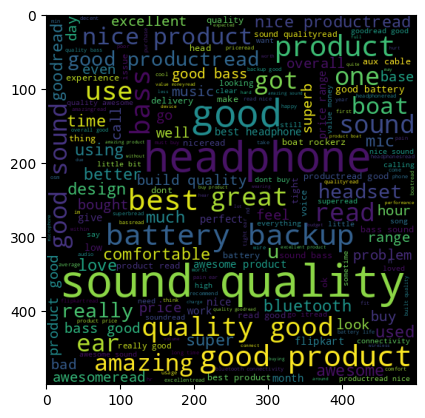

In [ ]:

m.imshow(wc)

In [ ]:
all_rows_text_joined = set(all_rows_text_joined)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow = CountVectorizer()

In [ ]:
bow.fit_transform(df["review"])

<9976x9857 sparse matrix of type '<class 'numpy.int64'>'
	with 85919 stored elements in Compressed Sparse Row format>

#SENTIMENT ANALYSIS

In [ ]:
nl.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sentiments=SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def sentiment_of_review(st):
   g= sentiments.polarity_scores(st)
   return g["compound"]


In [ ]:
df["Sentiment"]= df["review"].apply(lambda x : sentiment_of_review(x))

#Rough work

In [ ]:
aspects = ["design","durable","comfort","unsatisfied","less",
            "more","expensive","sound","cheap","weight","quality",
            "bad","worst","bluetooth","delivery","fast","slow","time","price",
            "low","high","expensive","package","best","bass","looks",
            "noise cancel","sound", "quality", "audio fidelity", "sound performance", "acoustic quality",
            "comfort", "wearability", "ergonomics", "cushioning",
            "fit", "headband fit", "ear cup fit", "headphone size",
            "durability", "build quality", "longevity", "sturdiness",
            "noise isolation", "sound blocking",
            "noise-canceling", "noise reduction",
            "wireless", "bluetooth", "cordless", "wireless connectivity",
            "battery life", "power duration", "battery performance",
            "portability", "compactness", "travel friendly",
            "design",  "appearance", "style",
            "controls", "operation",
            "microphone", "mic", "voice pickup",
            "price", "cost", "affordable", "price tag",
            "brand", "manufacturer", "label", "company",
            "connectivity", "wired/wireless connection", "pairing",
            "cable", "wired connection", "cord", "wire",
            "style", "fashion", "look", "trend",
            "weight", "heaviness", "mass", "load",
            "customization", "personalization", "configuration", "tailoring",
            "accessories", "add-ons", "extras", "included items",    "durability",
            "noise isolation","noise-canceling","wireless","battery life","portability","design",
            "controls","microphone","price","brand","connectivity","cable","style","weight","customization","accessories",
            "battery","bass","delivery","refund","late delivery","damaged","customer support","scam","time",
            "product","decent","bad","wire","defective","piece","charger","pocket friendly"




           ]


In [ ]:
def find_aspect(text):
  TEX= text.split(" ")
  asp=[]
  for i in TEX:
    if i in aspects:
      asp.append(i)

  return " ".join(asp)


In [ ]:
df["aspect"]=df.review.apply(lambda x : find_aspect(x))

In [ ]:
df

,review,rating,Sentiment,aspect
0,nice produt like design lot easy carry looked ...,5,0.8020,design
1,awesome soundvery pretty see nd sound quality ...,5,0.9501,sound quality product product
2,awesome sound quality pros 78 hrs battery life...,4,0.9440,sound quality battery sound bass sound sound
3,think good product per quality also design qui...,5,0.9702,product quality design product bass sound qual...
4,awesome bass sound quality good bettary long l...,5,0.8992,bass sound quality product
...,...,...,...,...
9969,shit service waste money,1,-0.7506,
9970,good product expensive,0,0.4404,product expensive
9971,scam good product plus price high,2,-0.2023,scam product price high
9972,selling unbranded goods recommended,0,0.2023,


#AGGREGATED SENTIMENT OF ALL ASPECTS

In [ ]:
aggregated_score_of_single_aspect={}

In [ ]:
for i in ["sound","quality","product","bass","treble","price","design","comfort","fit","wire","cord","package","delivery"]:
  dem= df[df["aspect"].str.contains(i)]

  score = dem["Sentiment"].sum()
  aggregated_score_of_single_aspect[i]=int(score)

In [ ]:
aggregated_score_of_single_aspect

{'sound': 1501,
 'quality': 1297,
 'product': 1315,
 'bass': 1098,
 'treble': 0,
 'price': 511,
 'design': 211,
 'comfort': 56,
 'fit': 68,
 'wire': 116,
 'cord': 2,
 'package': 5,
 'delivery': 133}

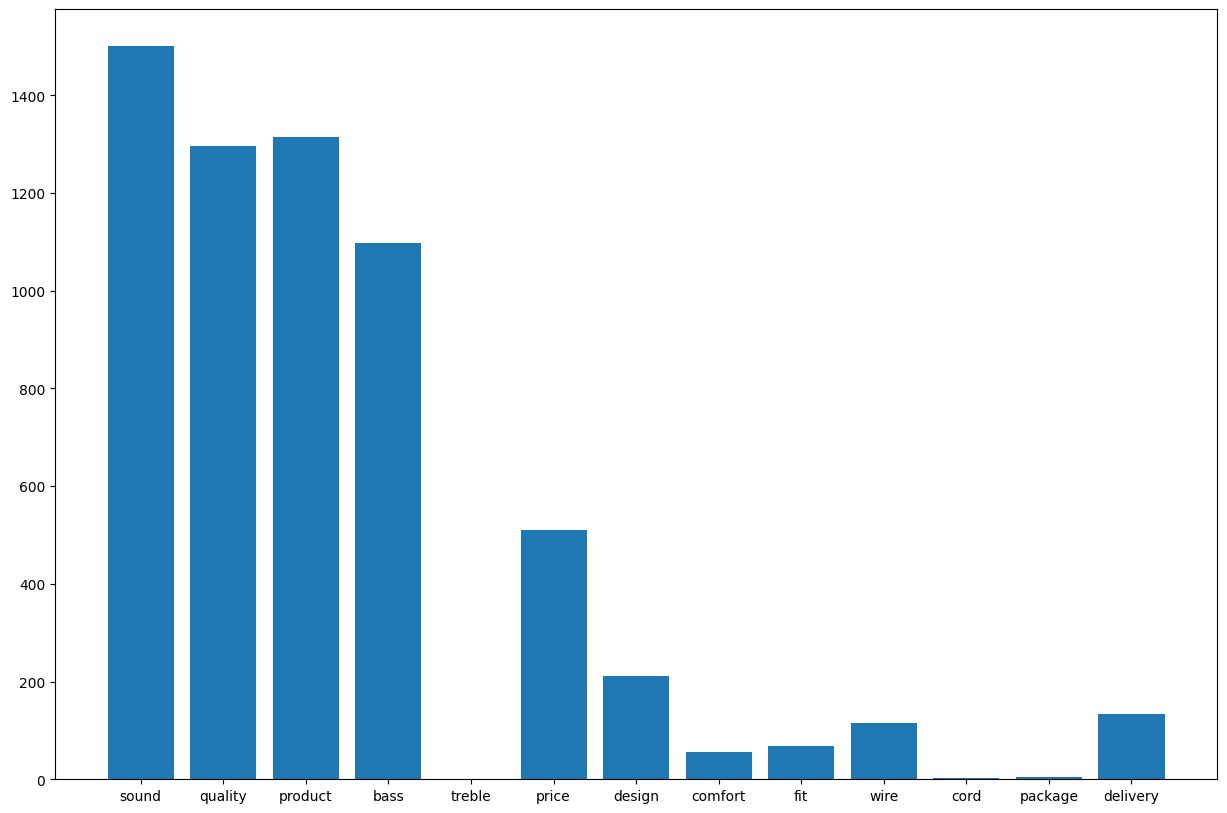

In [ ]:
m.figure(figsize=(15, 10))
m.bar(aggregated_score_of_single_aspect.keys(),aggregated_score_of_single_aspect.values())
m.show()

In [ ]:
for i in aggregated_score_of_single_aspect.keys():
  if aggregated_score_of_single_aspect[i]<=0:
    print(i)

treble


In [ ]:
df.query("aspect.str.len()==0")

,review,rating,Sentiment,aspect
94,works fine laptop well mobile ears aching usin...,4,-0.1779,
178,good wish master polite helping natureread,5,0.7783,
264,headphones absolute garbage using month alread...,2,-0.2263,
265,nice headphones 1499all things bassbattery etc...,5,0.8176,
312,love headphone amazing super easy use would pe...,4,0.9393,
...,...,...,...,...
9961,superb headphonesread,5,0.6249,
9966,awesome productread,4,0.6249,
9969,shit service waste money,1,-0.7506,
9972,selling unbranded goods recommended,0,0.2023,


In [ ]:
cm = sorted(dic_of_counts.items(),key=lambda x : x[1],reverse=True)

#CORRELATION BETWEEN MAIN ASPECTS

In [ ]:

for asp in ["sound","price","fit","comfort","quality","design","expensive","package","delivery","wire","cord"]:
    aspect_column = df[df['aspect'].str.contains(asp)]['Sentiment']
    for asp2 in ["sound","price","fit","comfort","quality","design","expensive","package","delivery","wire","cord"]:
      if asp2!=asp:
        asp2col = df[df['aspect'].str.contains(asp2)]['Sentiment']
      correlation = df['rating'].corr(aspect_column)
      print(asp,asp2,correlation)


sound sound 0.4861052087221782
sound price 0.4861052087221782
sound fit 0.4861052087221782
sound comfort 0.4861052087221782
sound quality 0.4861052087221782
sound design 0.4861052087221782
sound expensive 0.4861052087221782
sound package 0.4861052087221782
sound delivery 0.4861052087221782
sound wire 0.4861052087221782
sound cord 0.4861052087221782
price sound 0.2801308352566105
price price 0.2801308352566105
price fit 0.2801308352566105
price comfort 0.2801308352566105
price quality 0.2801308352566105
price design 0.2801308352566105
price expensive 0.2801308352566105
price package 0.2801308352566105
price delivery 0.2801308352566105
price wire 0.2801308352566105
price cord 0.2801308352566105
fit sound 0.5108588863664051
fit price 0.5108588863664051
fit fit 0.5108588863664051
fit comfort 0.5108588863664051
fit quality 0.5108588863664051
fit design 0.5108588863664051
fit expensive 0.5108588863664051
fit package 0.5108588863664051
fit delivery 0.5108588863664051
fit wire 0.51085888636640